<a href="https://colab.research.google.com/github/Haila-Abdullah/Generative-AI-course-with-AWS-and-udacity-/blob/main/Exercise_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Neural Networks
For this exercise, you will create a simple neural network example. We'll use a synthetic dataset to predict whether a customer will make a purchase based on two features:

-Website visit duration.                                              
-Number of pages visited.

This is a binary classification problem, and we'll use a small neural network for quick execution.

# Generate Synthetic Data

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

# Preprocess the Data

In [2]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

# Build and Train the Neural Network

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
16/16 [==============================] - 1s 2ms/step - loss: 0.6742 - accuracy: 0.5063
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.5562
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.5875
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.6313
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6562
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6875
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.7063
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.7188
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.7437
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7563


# Evaluate the Model

In [4]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 8ms/step - loss: 0.6142 - accuracy: 0.8000
Test Accuracy: 0.800000011920929


# Visualizing Training Process
You can modify the training code to save the history of training and then plot it:

Epoch 1/10
13/13 [==============================] - 1s 19ms/step - loss: 0.6326 - accuracy: 0.7500 - val_loss: 0.5985 - val_accuracy: 0.8125
Epoch 2/10
13/13 [==============================] - 0s 15ms/step - loss: 0.6289 - accuracy: 0.7500 - val_loss: 0.5946 - val_accuracy: 0.8125
Epoch 3/10
13/13 [==============================] - 0s 14ms/step - loss: 0.6253 - accuracy: 0.7500 - val_loss: 0.5896 - val_accuracy: 0.8125
Epoch 4/10
13/13 [==============================] - 0s 11ms/step - loss: 0.6213 - accuracy: 0.7500 - val_loss: 0.5856 - val_accuracy: 0.8125
Epoch 5/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6177 - accuracy: 0.7578 - val_loss: 0.5814 - val_accuracy: 0.8125
Epoch 6/10
13/13 [==============================] - 0s 21ms/step - loss: 0.6141 - accuracy: 0.7578 - val_loss: 0.5769 - val_accuracy: 0.8125
Epoch 7/10
13/13 [==============================] - 0s 13ms/step - loss: 0.6101 - accuracy: 0.7578 - val_loss: 0.5721 - val_accuracy: 0.8125
Epoch 8/10
13

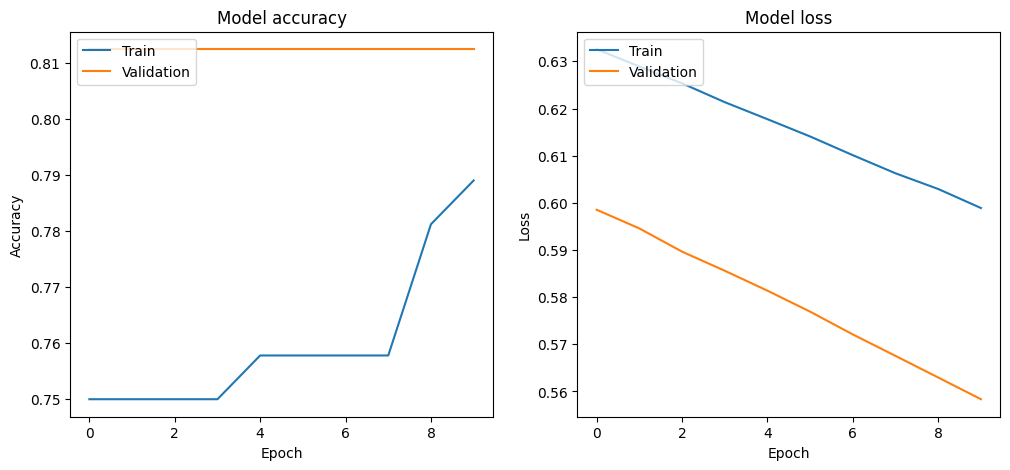

In [5]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Creating the Visual
For a simple model with two input features, you can plot the decision boundary:

313/313 [==============================] - 0s 1ms/step


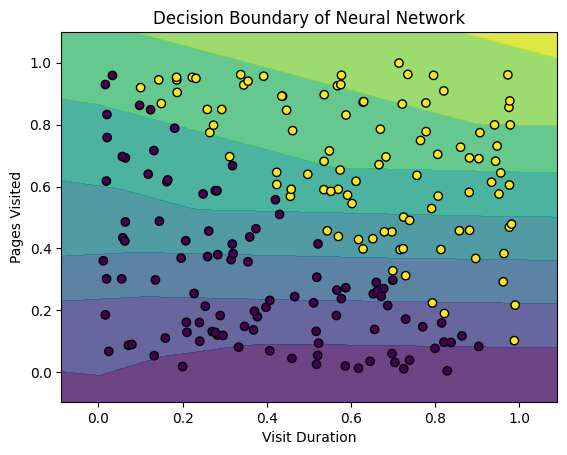

In [6]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()